In [10]:
from keras.models import load_model
from generator import captcha_generator as gen
from matplotlib import pyplot as plt
import cv2
import os
import numpy as np
import string
from tqdm import tqdm

In [2]:
chars = string.ascii_lowercase + string.ascii_uppercase
width, height, n_len, n_class = 130, 53, 4, len(chars)

In [20]:
model = load_model('weixin_trained_model_v3.h5')

In [21]:
def decode(y):
    y = np.argmax(np.array(y), axis=2)[:,0]
    return ''.join([chars[x] for x in y])

In [22]:
def yevaluate(model, cnt=1000):
    batch_acc = 0
    generator = gen(width=width, height=height, batch_size=1)
    for _ in tqdm(range(cnt)):
        X, y = generator.next()
        y_pred = model.predict(X)
        if decode(y).lower() == decode(y_pred).lower():
            batch_acc += 1
    return float(batch_acc) / cnt

In [23]:
print yevaluate(model, 10000)

100%|██████████| 10000/10000 [02:53<00:00, 57.63it/s]

0.9835


In [24]:
test_path = os.getcwd() + '/sample2'

In [29]:
x = cv2.imread(test_path+'/15.jpg')

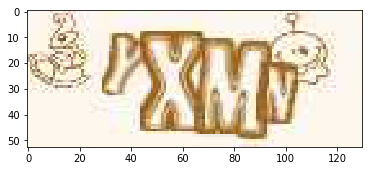

In [30]:
plt.imshow(cv2.cvtColor(x, cv2.COLOR_BGR2RGB))
plt.show()

In [31]:
pred_y = model.predict(x.reshape((1,)+x.shape))

In [32]:
decode(pred_y)

'sXWf'

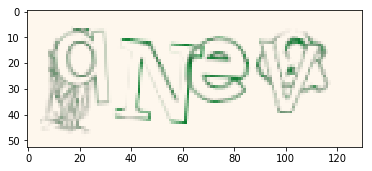

y: qNeV
pred_y: qNeV


In [35]:
a = gen(width=width, height=height, batch_size=1)
X, y = a.next()
pred_y = model.predict(X)
plt.imshow(cv2.cvtColor(X[0], cv2.COLOR_BGR2RGB))
plt.show()
print 'y:', decode(y)
print 'pred_y:', decode(pred_y)

In [33]:
test_path = os.getcwd() + '/sample2'
root, dirs, files = os.walk(test_path).next()

def getAllImages(path):
    cnt = len(files)
    X = np.zeros((cnt, height, width, 3), dtype=np.uint8)
    y = []
    for i, j in enumerate(files):
        X[i] = cv2.imread(root+'/'+j)
        #img = cv2.imread(root+'/'+j)
        #b, g, r = cv2.split(img)
        #X[i] = cv2.merge([r, g, b])
        y.append(j[:4])
    return X, y

allX, ally = getAllImages(test_path)

In [37]:
count = len(ally)
correct = 0
for i, j in zip(allX, ally):
    predy = model.predict(i.reshape(X.shape))
    predy = decode(predy)
    if predy.lower() == j.lower():
        correct += 1
print 'the total correct number is %d' %correct
print 'the right rate is %.2f%%' %(float(correct)/count*100)

the total correct number is 0
the right rate is 0.00%
